In [95]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [96]:
# Definición de la función que modela el sloshing
def sloshing(tau, y, epsilon, lambda_, omega):
    u, v = y
    dv_dtau = -(1 + epsilon * lambda_ * omega**2 * np.cos(omega*tau)) * (u - (epsilon**2 * u**3)/6)
    return [v, dv_dtau]

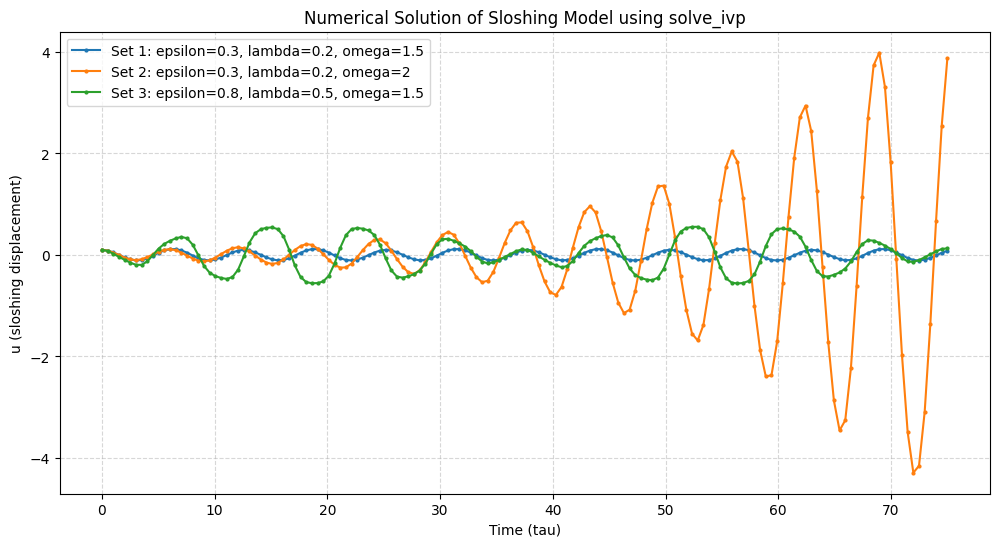

In [97]:
# Condiciones iniciales
u0 = [0.1, 0] # Desplazamiento inicial u(0) = 0.1, velocidad inicial du/dtau(0) = 0
time_span = (0, 75) # Intervalo de tiempo (tau)
time_eval = np.linspace(0, 75, 150) # Puntos donde se evaluará la solución

# Parámetros de simulación (epsilon, lambda, omega)
params1 = (0.3, 0.2, 1.5)
params2 = (0.3, 0.2, 2)
params3 = (0.8, 0.5, 1.5)

# Resolver el sistema de ecuaciones diferenciales para cada conjunto de parámetros
sol1 = solve_ivp(sloshing, time_span, u0, args=params1, t_eval=time_eval) 
sol2 = solve_ivp(sloshing, time_span, u0, args=params2, t_eval=time_eval) 
sol3 = solve_ivp(sloshing, time_span, u0, args=params3, t_eval=time_eval) 

# Graficar las soluciones
plt.figure(figsize=(12, 6))
plt.plot(sol1.t, sol1.y[0], label=f"Set 1: epsilon={params1[0]}, lambda={params1[1]}, omega={params1[2]}", linestyle='-', marker='o', markersize=2)
plt.plot(sol2.t, sol2.y[0], label=f"Set 2: epsilon={params2[0]}, lambda={params2[1]}, omega={params2[2]}", linestyle='-', marker='o', markersize=2)
plt.plot(sol3.t, sol3.y[0], label=f"Set 3: epsilon={params3[0]}, lambda={params3[1]}, omega={params3[2]}", linestyle='-', marker='o', markersize=2)
plt.ylim()
plt.xlabel("Time (tau)")
plt.ylabel("u (sloshing displacement)")
plt.title("Numerical Solution of Sloshing Model using solve_ivp")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

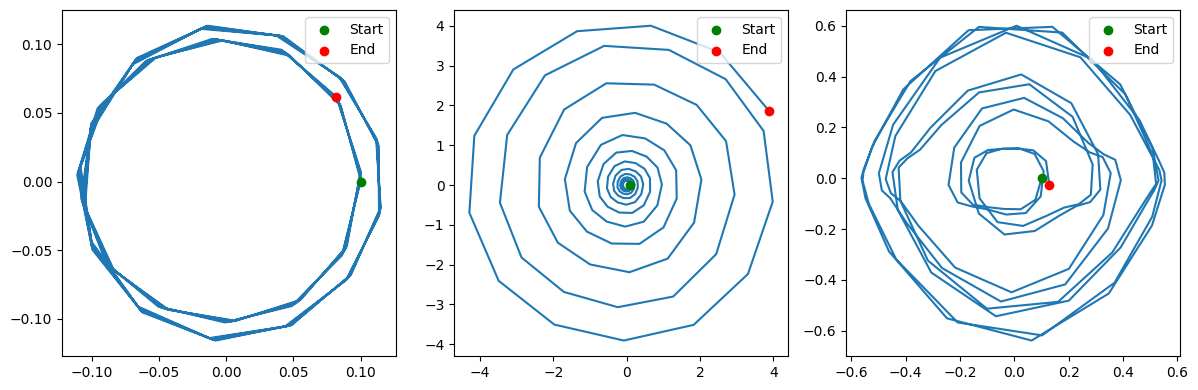

In [98]:
# Graficar desplazamiento vs velocidad
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(sol1.y[0], sol1.y[1])
plt.scatter(sol1.y[0, 0], sol1.y[1, 0], color='green', label='Start', zorder=3)
plt.scatter(sol1.y[0, -1], sol1.y[1, -1], color='red', label='End', zorder=3)
plt.legend(loc='upper right')

plt.subplot(1, 3, 2)
plt.plot(sol2.y[0], sol2.y[1])
plt.scatter(sol2.y[0, 0], sol2.y[1, 0], color='green', label='Start', zorder=3)
plt.scatter(sol2.y[0, -1], sol2.y[1, -1], color='red', label='End', zorder=3)
plt.legend(loc='upper right')

plt.subplot(1, 3, 3)
plt.plot(sol3.y[0], sol3.y[1])
plt.scatter(sol3.y[0, 0], sol3.y[1, 0], color='green', label='Start', zorder=3)
plt.scatter(sol3.y[0, -1], sol3.y[1, -1], color='red', label='End', zorder=3)
plt.legend(loc='upper right')

plt.tight_layout()

# Conclusiones sobre el impacto de los parámetros en el sloshing:  
Conjunto 1: epsilon = 0.3, lambda = 0.2, omega = 1.5  
Conjunto 2: epsilon = 0.3, lambda = 0.2, omega = 2  
Conjunto 3: epsilon = 0.8, lambda = 0.5, omega = 1.5  

## Epsilon y Lambda 
A medida que estos parámetros aumentan, el sistema se vuelve más inestable y las oscilaciones son más pronunciadas. Esto se observa al comparar los resultados obtenidos entre el conjunto 1 y 3 de parámetros, donde los desplazamientos son mayores cuando se aumentan los valores de epsilon, lambda y se deja igual el valor de omega. Valores pequeños de epsilon y lambda tienden a producir oscilaciones más controladas. 

## Omega
Un aumento en el valor de omega cambia la dinámica del sistema, generando mayores oscilaciones. Esto se observa al comparar los resultados obtenidos entre el conjunto 1 y 2 de parámetros, donde los desplazamientos son mayores cuando epsilon y lambda permanecen constantes y se incrementa omega. Este cambio provoca desplazamientos con tendencia a seguir creciendo, incluso para valores relativamente pequeños de epsilon y lambda.